In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp, odeint

Text(0.5, 1.0, 'Dados do Rio de Janeiro e modelo SIR com R0: 1.207 e 0.975.')

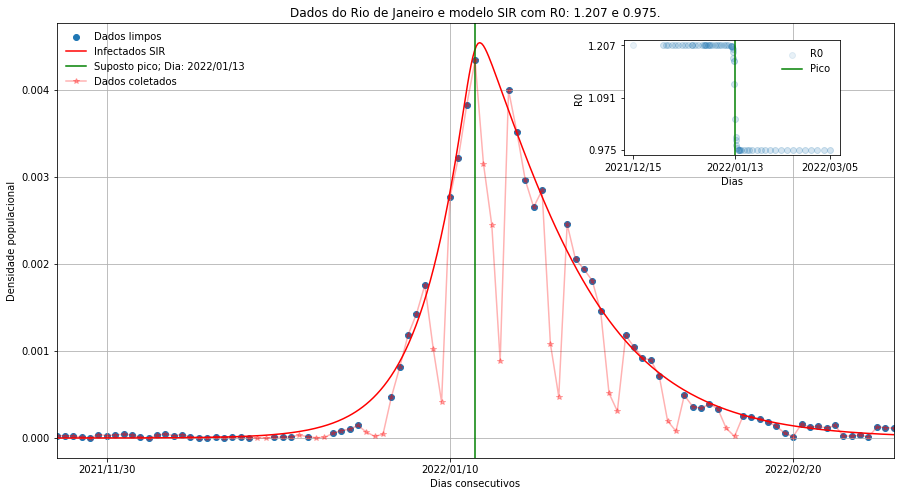

In [9]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')


população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 615
leste = 780

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  700

coef_sub = 0.207  # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.025

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,leste)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label=f"Suposto pico; Dia: {dados0.loc[t_pico]['Datas']}")
#ax.plot(list_t, list_R0)

ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')


ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax2.set_xticks([oeste,t_pico,leste], labels=label2)
ax2.legend(frameon=False)

#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([650,750])
ax.set_title(f'Dados do Rio de Janeiro e modelo SIR com R0: {coef_sub + 1} e {coef_des + 1}.')

Text(0.5, 1.0, 'Dados do Rio de Janeiro, modelo SIR com R0: 1.16 e 0.9 e população de 180000000.')

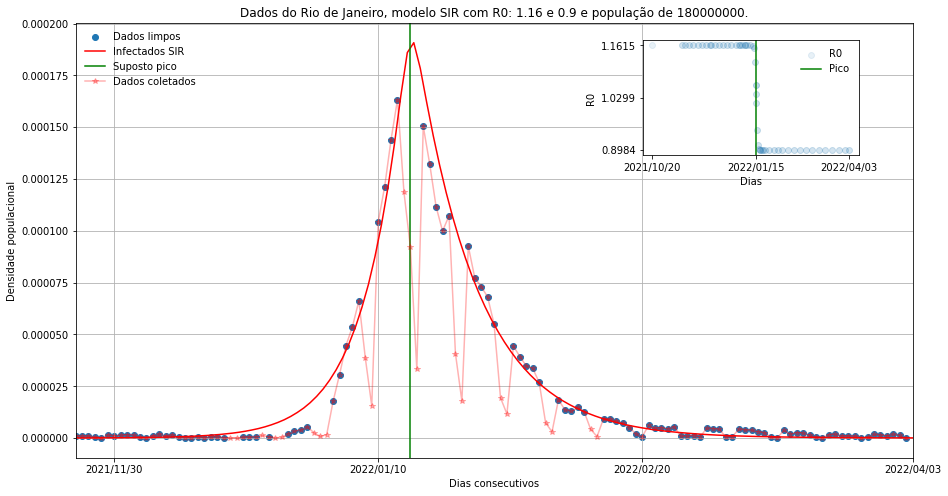

In [10]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')


população = 180000000 #6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 615
leste = 780

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  702

coef_sub = 0.1615219031945897 
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 8e-11
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,leste-oeste)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label='Suposto pico')
#ax.plot(list_t, list_R0)

ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')


ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
label2 = [dados0.loc[oeste]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[leste]['Datas']]
ax2.set_xticks([oeste,t_pico,leste], labels=label2)
ax2.legend(frameon=False)


#ax.set_ylim([0,5e-3])

#plt.yscale('log')
ax.set_xlim([650,780])
ax.set_title(f'Dados do Rio de Janeiro, modelo SIR com R0: {round(coef_sub + 1,2)} e {round(coef_des + 1,2)} e população de {população}.')

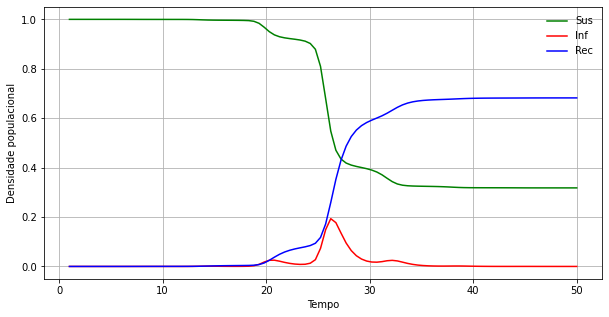

In [13]:
# SIR

def sir(t, y):
    s, i, r = y
    R0 = np.exp(t/100+np.cos(t))
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    #print(R0)
    return dsdt, didt, drdt

t0, t = 1, 50
i0 = 1e-5
r0 = 0
s0 = 1 - i0 - r0

t_discreto = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=t_discreto)
    
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)

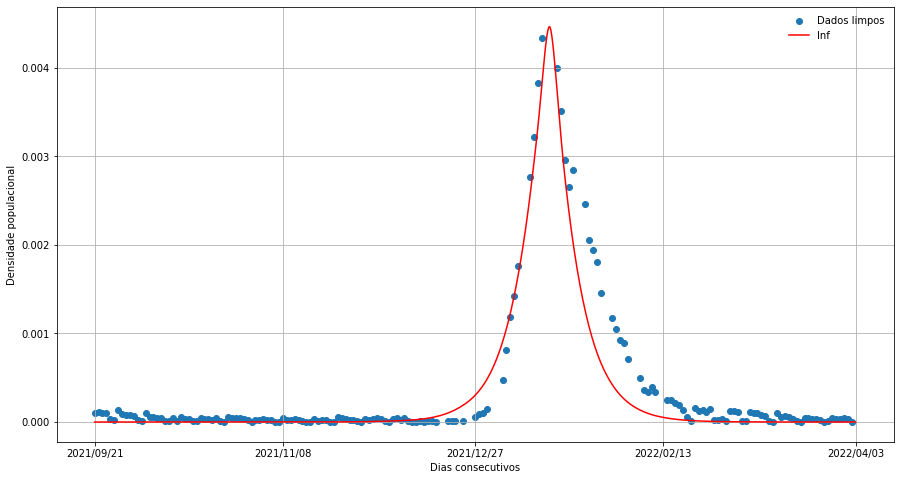

In [16]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

população = 6775561

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 586
leste = 780

##############################

def sir(t, y):
    s, i, r = y
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt


t_pico =  702

coef_sub = 0.1615219031945897    # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,t)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao) #


##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
#ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1217927061282D+11   r2 =  0.2508209119123D+02


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


(0.0, 1e-07)

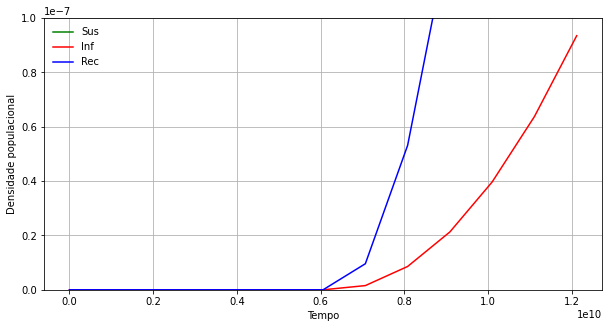

In [17]:
# Testando I0

# SIR
list_t = []
list_R0 = []

def sir(t, y):
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media

    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_t.append(t)
    list_R0.append(R0)
    return dsdt, didt, drdt

t_pico =  1000000000000

coef_sub = 0.1615219031945897 
coef_des = -0.10162445674343068

media = (coef_sub+coef_des)/2
assintotas = coef_sub - media

t0, t = 0, 1e+11
i0 = np.exp(-118.48)
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,100)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Inf')
ax.plot(res.t, res.y[2], 'b', label='Rec')

ax.set_xlabel('Tempo')
ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
ax.set_ylim([0,1e-7])


Text(0.5, 1.0, 'Dados de Niterói e modelo SIR com R0: 1.207 e 0.958.')

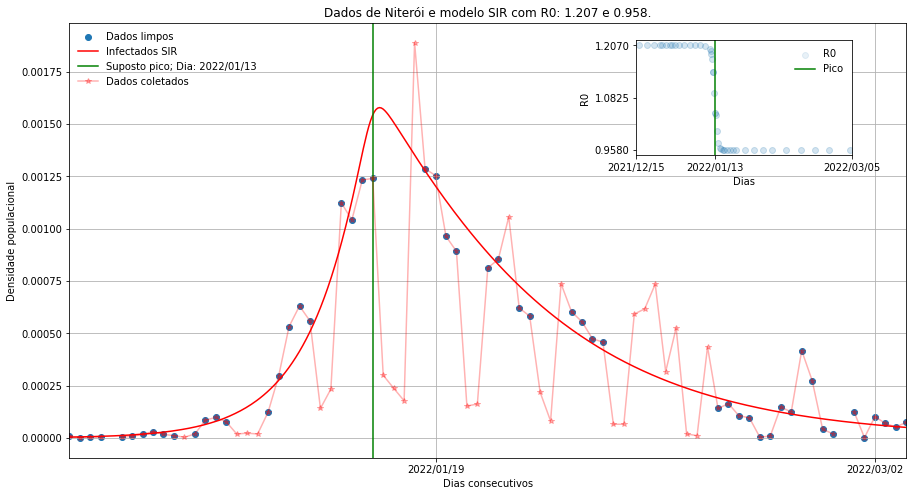

In [4]:
# SIR

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Niterói_casos_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Niterói_casos.csv')


população = 516981
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/niteroi.html> 28/04/2022

nome_cidade = 'Niterói'

# Intervalos

oeste = 590
leste = 760

##############################
list_R0 = [] 
list_t = []

def sir(t, y):
    
    s, i, r = y
    
    R0 = -np.tanh((t - t_pico))*assintotas + 1 + media
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)

    return dsdt, didt, drdt


t_pico =  669

coef_sub = 0.207  # Dado obtido pelos dados da cidade do Rio de Janeiro
coef_des = -0.042

media = (coef_sub+coef_des)/2 # Deslocamento no eixo-y
assintotas = coef_sub - media


t0, t = oeste, leste
i0 = 1e-10
#i0 = np.exp(-118.48)
r0 = 0
s0 = 1 - i0 - r0

resolucao = np.linspace(t0,t,1000)

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao, method='LSODA')


##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_nit = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_nit = dados1.index[oeste:leste].to_numpy()

##############################
# Plot

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res.t, res.y[0],'g', label='Sus')
ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
#ax.plot(res.t, res.y[2], 'b', label='Rec')
ax.axvline(t_pico, color='g',label=f"Suposto pico; Dia: {dados0.loc[t_pico]['Datas']}")
#ax.plot(list_t, list_R0)

ax.plot(dados1_x_nit, dados1_y_nit,'*-r', alpha=0.3, label='Dados coletados')


ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False, loc='upper left')
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)



ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
ax2.set_ylabel('R0')
ax2.set_xlabel('Dias')
ax2.axvline(t_pico, color='g',label='Pico')
ax2.set_yticks([coef_sub+1,coef_des+1, (coef_des+1 + coef_sub+1)/2 ])
ax2.legend(frameon=False)


#ax.set_ylim([0,5e-3])

#plt.yscale('log')

x_esq = 640
x_dir = 720

label2 = [dados0.loc[x_esq]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[x_dir]['Datas']]

ax2.set_xticks([x_esq,t_pico,x_dir], labels=label2)

ax2.set_xlim([x_esq,x_dir])
ax.set_xlim([x_esq,x_dir])
ax.set_title(f'Dados de Niterói e modelo SIR com R0: {coef_sub + 1} e {coef_des + 1}.')